In [98]:
import streamlit as st
import matplotlib.pyplot as plt
import pandas as pd

#Part 1: Data Loading and Basic Exploration

data = pd.read_csv("metadata.csv", low_memory = False)

#checks information of the metadata
print(data.info())

#examines the first ten rows
data = data.head(10)
print(data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non-null   object 
 16  

In [99]:
#checks the rows and columns of the metadata
print(data.shape)

#identifies the data types of each column
print(data.dtypes)

#checking missing values in important columns
print(data.isnull().sum())

#performing statistics on numerical columns
print(data.describe())

(10, 19)
cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id            object
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id     object
arxiv_id             object
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
dtype: object
cord_uid             0
sha                  0
source_x             0
title                0
doi                  0
pmcid                0
pubmed_id            0
license              0
abstract             0
publish_time         0
authors              0
journal              0
mag_id              10
who_covidence_id    10
arxiv_id            10
pdf_json_files       0
pmc_json_files       0
url                  0
s2_id               10
dtype: i

In [103]:
#identifying columns with many missing values
many_null = (data.isnull().sum() / len(data)) * 100
many_null = many_null[many_null > 50]

#dropping columns with null values
data = data.dropna(axis=1)
print(data)




   cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   
5  zjufx4fo  b2897e1277f56641193a6db73825f707eed3e4c9      PMC   
6  5yhe786e  3bb07ea10432f7738413dff9816809cc90f03f99      PMC   
7  8zchiykl  5806726a24dc91de3954001effbdffd7a82d54e2      PMC   
8  8qnrcgnk  faaf1022ccfe93b032c5608097a53543ba24aedb      PMC   
9  jg13scgo  5b44feca5d6ffaaeb66501fa84cc6dd44d06660a      PMC   

                                               title  \
0  Clinical features of culture-proven Mycoplasma...   
1  Nitric oxide: a pro-inflammatory mediator in l...   
2    Surfactant protein-D and pulmonary host defense   
3               Role of endothelin-1 in lung dise

In [160]:
#converting date columns to datetime format
data['publish_time'] = pd.to_datetime(data['publish_time'], errors = 'coerce')
#Extracting year from publication date
data['year'] = data['publish_time'].dt.year
print(data)







   cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   
5  zjufx4fo  b2897e1277f56641193a6db73825f707eed3e4c9      PMC   
6  5yhe786e  3bb07ea10432f7738413dff9816809cc90f03f99      PMC   
7  8zchiykl  5806726a24dc91de3954001effbdffd7a82d54e2      PMC   
8  8qnrcgnk  faaf1022ccfe93b032c5608097a53543ba24aedb      PMC   
9  jg13scgo  5b44feca5d6ffaaeb66501fa84cc6dd44d06660a      PMC   

                                               title  \
0  Clinical features of culture-proven Mycoplasma...   
1  Nitric oxide: a pro-inflammatory mediator in l...   
2    Surfactant protein-D and pulmonary host defense   
3               Role of endothelin-1 in lung dise

In [150]:
#counting papers by publication year
counting = data['year'].value_counts()
print(counting)

#Identifying top journals publishing COVID-19 research
top_journals = data['journal'].value_counts()
print(top_journals)

#Most frequent words in titles
# Combine all titles into one string
words = " ".join(data['title']).lower().split()
word_to_count = {}

for word in words:
    if word in word_to_count:
        word_to_count[word] += 1
    else:
        word_to_count[word] = 1
print(word_to_count)



year
2001    6
2000    2
2003    2
Name: count, dtype: int64
journal
Respir Res                                                 5
Crit Care                                                  2
BMC Infect Dis                                             1
The EMBO Journal                                           1
Journal of the American Medical Informatics Association    1
Name: count, dtype: int64
{'clinical': 1, 'features': 1, 'of': 3, 'culture-proven': 1, 'mycoplasma': 1, 'pneumoniae': 1, 'infections': 1, 'at': 1, 'king': 1, 'abdulaziz': 1, 'university': 1, 'hospital,': 1, 'jeddah,': 1, 'saudi': 1, 'arabia': 1, 'nitric': 1, 'oxide:': 1, 'a': 2, 'pro-inflammatory': 1, 'mediator': 1, 'in': 5, 'lung': 2, 'disease?': 1, 'surfactant': 1, 'protein-d': 1, 'and': 3, 'pulmonary': 2, 'host': 1, 'defense': 1, 'role': 1, 'endothelin-1': 1, 'disease': 1, 'gene': 1, 'expression': 1, 'epithelial': 1, 'cells': 1, 'response': 1, 'to': 2, 'pneumovirus': 1, 'infection': 1, 'sequence': 1, 'requirements':

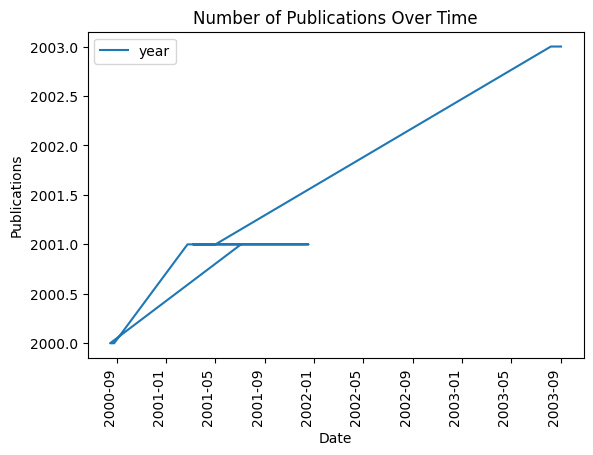

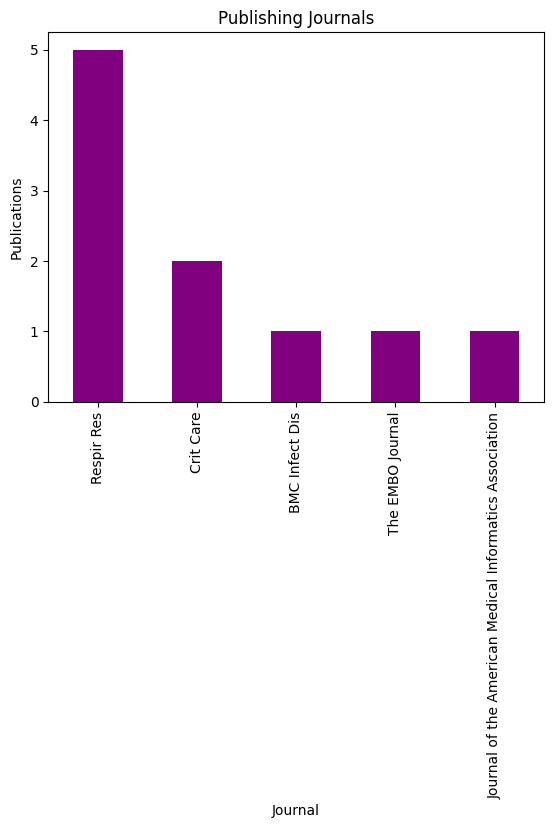

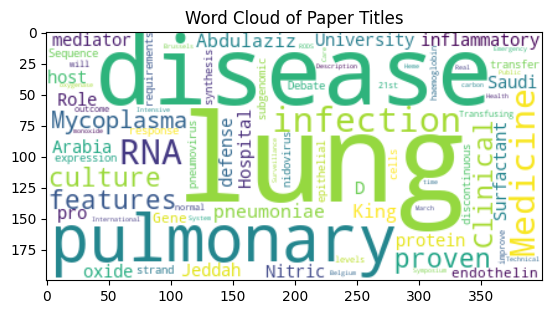

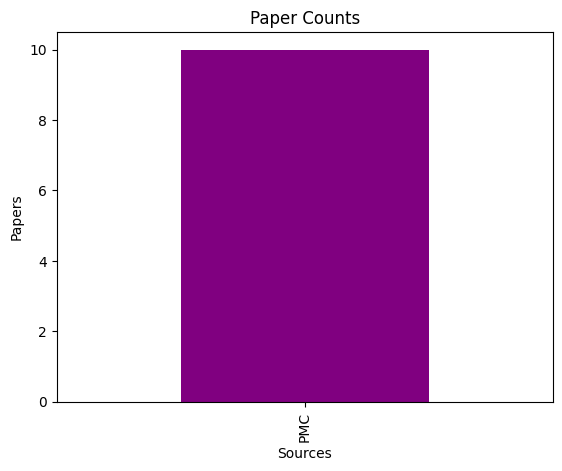

In [176]:

#Plotting number of publications over time

publications = data.set_index('publish_time')
publications.plot(kind='line')
plt.title("Number of Publications Over Time")
plt.xlabel("Date")
plt.ylabel("Publications")
plt.xticks(rotation=90)
plt.show()

#Bar chart of top Publishing Journals
top_journals = data['journal'].value_counts()
top_journals.plot(kind='bar', color = 'purple')
plt.title("Publishing Journals")
plt.xlabel("Journal")
plt.ylabel("Publications")
plt.xticks(rotation=90)
plt.show()

#Generating a word cloud of paper titles
from wordcloud import WordCloud
words = " ".join(data['title'].dropna().astype(str))
wordcloud = WordCloud(background_color='white').generate(words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Paper Titles")
plt.show()

#Plotting distribution of paper counts by source
sources = data['source_x'].value_counts()
sources.plot(kind='bar', color = 'purple')
plt.title("Paper Counts")
plt.xlabel("Sources")
plt.ylabel("Papers")
plt.xticks(rotation=90)
plt.show()






In [ ]:
#Building a streamlit app

st.title("CORD-19 Data Explorer")
st.write("Simple exploration of COVID-19 research papers")

st.subheader("Number of Publications Over Time")
publications = data['publish_time']
st.line_chart(publications)

st.subheader("Top Publishing Journals")
slide = st.slider("Select number of top journals to display:", 5, 30, 10)
top_journals = data['journal'].value_counts().head(slide)
st.bar_chart(top_journals, x = "Journal", y = "publications")


st.subheader("Word Cloud of Paper Titles")
words = " ".join(data['title'])
wordcloud = WordCloud(background_color='white',width=800,height=400).generate(words)
fig, ax = plt.subplots()
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
st.pyplot(fig)

st.subheader("Paper Counts by Source")
slide = st.slider("Select number of sources to display:", 5, 30, 10, key="src")
sources = data['source_x'].value_counts().head(slide)
st.bar_chart(sources)



SyntaxError: invalid syntax (3858280178.py, line 9)